# Import Library dan mount drive

In [1]:
# import library
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir(r'/content/drive/My Drive/Colab Notebooks/')

In [4]:
pwd

'/content/drive/My Drive/Colab Notebooks'

# Load Dataset

In [5]:
# melakukan load dari csv ke dalam bentuk pandas dataframe
df=pd.read_csv('fetal_health.csv')

In [6]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# Data Description dan analisa

In [7]:
# melihat tipe dari tiap kolom di dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
# melihat persebaran data dari setiap kolom, seperti variance dan std
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [9]:
# melihat jumlah missing value
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [10]:
# mengecek duplicate value
df.duplicated().any()

True

In [11]:
# melihat jumlah ketika ada duplicate value
df.shape

(2126, 22)

In [12]:
# melihat jumlah setiap kelas di kolom target
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [13]:
labels=['Normal','Suspect', 'Pathological']

In [14]:
# distribusi data dari satu kolom ke kolom yang lain
#sns.pairplot(df,hue="fetal_health")

# PraProses


`Ini kalian bisa melakukan pra proses menyesuaikan kondisi data.
Beberapa masalah yang harus diatasi:
Missing Value
Extreme Value (outlier)
Encoding atribut kateogrikal
Normalisasi
Feature engineering
dll.
Intinya menyesuaikan problem!`

## Handling Duplicate Value

In [15]:
# menghapus duplicate value lalu menampilkan jumlah akhir
dfd = df.copy()
dfd.drop_duplicates(inplace=True)
dfd.shape

(2113, 22)

In [16]:
# mengecek duplicate value di data baru
df = dfd.copy()
df.duplicated().any()

False

In [17]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,8.166635,70.535258,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,5.632912,39.007706,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,68.000000,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Train Test Split


In [18]:
# X adalah kolom attribut tanpa kolom target
X=df.iloc[:,:-1]
X.head(2)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0


In [19]:
# y adalah kolom yang hanya target
y=df.iloc[:,-1]
y.head(2)

0    2.0
1    1.0
Name: fetal_health, dtype: float64

In [20]:
# untuk memisahkan data train dan test -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# param stratify : data displit secara stratified -> https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42,stratify=y) 

# Normalisasi

In [21]:
# untuk mengatasi perbedaan nilai antar kolom -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #tanpa target
X_test_scaled = scaler.transform(X_test)

# Evaluation

In [22]:
# function untuk melakukan perhitungan seluruh metric evaluasi -> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(true_labels, predicted_labels):
    acc=np.round(accuracy_score(true_labels, predicted_labels),4)
    prec=np.round(precision_score(true_labels, predicted_labels,average='weighted'),4)
    recall=np.round(recall_score(true_labels, predicted_labels,average='weighted'),4)
    f1=np.round(f1_score(true_labels, predicted_labels,average='weighted'),4)
    return [acc,prec,recall,f1]

# Model

In [23]:
kolom=['Model','Acc','Precision','Recall','F1']
HASIL_AKHIR=pd.DataFrame(columns=kolom)

In [24]:
HASIL_AKHIR2=pd.DataFrame(columns=kolom)

## K-NN

In [25]:
# fit model KNN -> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9) # default nilai k = 5
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [26]:
# predict model ke data test
y_pred_knn=knn.predict(X_test)

In [27]:
# evaluation score untuk model KNN
get_metrics(y_test,y_pred_knn)

[0.8943, 0.89, 0.8943, 0.8903]

In [28]:
hasil=['knn dengan n 5']+get_metrics(y_test,y_pred_knn)

In [29]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [30]:
knn = KNeighborsClassifier(n_neighbors=9) # default nilai k = 5
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
get_metrics(y_test,y_pred_knn)
hasil=['knn dengan n 9 uniform']+get_metrics(y_test,y_pred_knn)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [31]:
knn = KNeighborsClassifier(n_neighbors=9) # default nilai k = 5
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
get_metrics(y_test,y_pred_knn)
hasil=['knn dengan n 9 distance']+get_metrics(y_test,y_pred_knn)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [104]:
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20, weights='uniform') # default nilai k = 5
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)
get_metrics(y_test,y_pred_knn)
hasil=['knn best randomsearch']+get_metrics(y_test,y_pred_knn)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [33]:
# print("i    acc    pre     rec   F1")
# for i in range(2, 21):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)

#     y_pred_knn=knn.predict(X_test)

#     print(i, get_metrics(y_test,y_pred_knn))

## Random Forest

In [34]:
# fit model Random Forest -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
# predict model ke data test
y_pred_rf=rf.predict(X_test)

In [36]:
# evaluation score untuk model Random Forest
get_metrics(y_test,y_pred_rf)

[0.9479, 0.9466, 0.9479, 0.9462]

In [37]:
hasil=['RF Gini dengan N Est 100']+get_metrics(y_test,y_pred_rf)

In [38]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [39]:
rf = RandomForestClassifier(random_state=42, criterion='entropy')
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
get_metrics(y_test,y_pred_rf)
hasil=['RF Entropy dengan N Est 100']+get_metrics(y_test,y_pred_rf)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [40]:
rf = RandomForestClassifier(random_state=42, criterion='entropy', n_estimators=69)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
get_metrics(y_test,y_pred_rf)
hasil=['RF Entropy dengan N Est 69']+get_metrics(y_test,y_pred_rf)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [41]:
rf = RandomForestClassifier(random_state=42, criterion='entropy', n_estimators=69, bootstrap=False)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
get_metrics(y_test,y_pred_rf)
hasil=['RF Entropy dengan N Est 69 bootstrap false']+get_metrics(y_test,y_pred_rf)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [107]:
rf = RandomForestClassifier(random_state=111, criterion='entropy', bootstrap=True, max_features='auto', n_estimators=97)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
get_metrics(y_test,y_pred_rf)
hasil=['RF Entropy best randomsearch']+get_metrics(y_test,y_pred_rf)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [43]:
# print("i    acc    pre     rec   F1")
# for i in range(10, 101):
#     rf = RandomForestClassifier(random_state=42, criterion='entropy', n_estimators=i)
#     rf.fit(X_train, y_train)

#     y_pred_rf=rf.predict(X_test)

#     print(i, get_metrics(y_test,y_pred_rf))

## XGBoost

In [44]:
# run di local -> pip install xgboost

# fit model XGBoost -> https://xgboost.readthedocs.io/en/latest/
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
# predict model ke data test
y_pred_xgb=xgb.predict(X_test)

In [46]:
# evaluation score untuk model XGBoost
get_metrics(y_test,y_pred_xgb)

[0.9479, 0.9463, 0.9479, 0.9459]

In [47]:
#hasil dart
hasil=['XGB gbtree']+get_metrics(y_test,y_pred_xgb)

In [48]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [49]:
xgb = XGBClassifier(random_state=42, booster ='gblinear')
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)
get_metrics(y_test,y_pred_xgb)
hasil=['XGB gblinear']+get_metrics(y_test,y_pred_xgb)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [109]:
xgb = XGBClassifier(random_state=158, booster ='gbtree')
xgb.fit(X_train, y_train)
y_pred_xgb=xgb.predict(X_test)
get_metrics(y_test,y_pred_xgb)
hasil=['XGB best randomsearch']+get_metrics(y_test,y_pred_xgb)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

# Decision Tree

In [51]:
# fit model Decision Tree -> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [52]:
# predict model ke data test
y_pred_dt=dt.predict(X_test)

In [53]:
# evaluation score untuk model Decision Tree
get_metrics(y_test,y_pred_dt)

[0.9274, 0.9273, 0.9274, 0.9271]

In [54]:
hasil=['dt gini']+get_metrics(y_test,y_pred_dt)

In [55]:
# concat ke dataframe perbandingan score
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [56]:
dt = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
get_metrics(y_test,y_pred_dt)
hasil=['dt entropy best']+get_metrics(y_test,y_pred_dt)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [57]:
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='random')
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
get_metrics(y_test,y_pred_dt)
hasil=['dt entropy random']+get_metrics(y_test,y_pred_dt)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

In [111]:
dt = DecisionTreeClassifier(random_state=118, criterion='entropy', splitter='best', max_features='auto')
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
get_metrics(y_test,y_pred_dt)
hasil=['dt best randomsearch']+get_metrics(y_test,y_pred_dt)
HASIL_AKHIR=pd.concat([HASIL_AKHIR,pd.DataFrame([hasil],columns=kolom)])

## Hasil Akhir

In [112]:
# dataframe perbandingan model
from IPython.display import display 
print("Aulia Ihza-05111840000089-KELAS KK D")
display(HASIL_AKHIR)
print("Hasil terbaik didapatkan dari model dengan RF Entropy karena memiliki value f1 tertinggi")

Aulia Ihza-05111840000089-KELAS KK D


,Model,Acc,Precision,Recall,F1
0,knn dengan n 5,0.8943,0.8900,0.8943,0.8903
0,knn dengan n 9 uniform,0.8943,0.8900,0.8943,0.8903
0,knn dengan n 9 distance,0.8943,0.8900,0.8943,0.8903
0,RF Gini dengan N Est 100,0.9479,0.9466,0.9479,0.9462
0,RF Entropy dengan N Est 100,0.9495,0.9482,0.9495,0.9478
0,RF Entropy dengan N Est 69,0.9543,0.9534,0.9543,0.9525
0,RF Entropy dengan N Est 69 bootstrap false,0.9511,0.9502,0.9511,0.9493
0,XGB gbtree,0.9479,0.9463,0.9479,0.9459
0,XGB gblinear,0.8076,0.7837,0.8076,0.7802
0,dt gini,0.9274,0.9273,0.9274,0.9271


Hasil terbaik didapatkan dari model dengan RF Entropy karena memiliki value f1 tertinggi


# CrossVal KNN

In [60]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
rf_cv = KNeighborsClassifier()
cv_results = cross_validate(rf_cv, X_scaled , y, cv=5)
# sorted(cv_results.keys())
cv_results

{'fit_time': array([0.00887871, 0.00619054, 0.00603509, 0.00545287, 0.00596428]),
 'score_time': array([0.03905845, 0.03651381, 0.035357  , 0.03731227, 0.04887581]),
 'test_score': array([0.81323877, 0.8108747 , 0.89598109, 0.84123223, 0.75592417])}

In [61]:
cv_results['test_score'].mean()

0.8234501921504039

# Random Search KNN

In [62]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as model_selection

In [63]:
# parameter yang ingin diujicoba
param_grid = {
    'n_neighbors': range(1,51),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    # 'n_estimators': [700, 800, 900, 1000, 1100, 1200]
}

In [64]:
# inisiasi model
clf = KNeighborsClassifier()

In [65]:
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=100,cv=2)

In [66]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(1, 51),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [67]:
# parameter grid search terbaik
grid_search.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 20, 'weights': 'uniform'}

In [68]:
#pd.concat([pd.DataFrame(grid_search.cv["params"]),pd.DataFrame(grid_search.cv["mean_test_score"], columns=["Accuracy"])],axis=1)

In [69]:
# skor grid serach terbaik
grid_search.best_score_

0.8215768434104527

# CrossVal RF

In [70]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
rf_cv = RandomForestClassifier()
cv_results = cross_validate(rf_cv, X_scaled , y, cv=5)
# sorted(cv_results.keys())
cv_results

{'fit_time': array([0.29763222, 0.26725745, 0.2603879 , 0.26130509, 0.26454568]),
 'score_time': array([0.01188993, 0.01053929, 0.01078391, 0.01048303, 0.01039815]),
 'test_score': array([0.86524823, 0.89598109, 0.92671395, 0.86966825, 0.76540284])}

In [71]:
cv_results['test_score'].mean()

0.8646028704917482

# Random Search RF

In [72]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV

In [73]:
# parameter yang ingin diujicoba
param_grid = {
    'random_state': range(0,201),
    'n_estimators': range(1,1201),
    'bootstrap': [True, False],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto','sqrt','log2'],
    # 'bootstrap': [True, False],
    # 'max_depth': range(80, 121),
    # 'max_features': ['sqrt', 'auto'],
    # 'min_samples_leaf': [1, 2, 3],
    # 'n_estimators': [700, 800, 900, 1000, 1100, 1200]
}

In [74]:
# inisiasi model
clf = RandomForestClassifier()

In [75]:
grid_search = RandomizedSearchCV(clf, param_grid,n_iter=100,cv=2)

In [76]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [77]:
# parameter grid search terbaik
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 97,
 'random_state': 111}

In [78]:
#pd.concat([pd.DataFrame(grid_search.cv["params"]),pd.DataFrame(grid_search.cv["mean_test_score"], columns=["Accuracy"])],axis=1)

In [79]:
# skor grid serach terbaik
grid_search.best_score_

0.849984590464723

# CrossVal XGBoost

In [80]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
rf_cv = XGBClassifier()
cv_results = cross_validate(rf_cv, X_scaled , y, cv=5)
# sorted(cv_results.keys())
cv_results

{'fit_time': array([0.34837914, 0.32112527, 0.32300782, 0.31372285, 0.31613517]),
 'score_time': array([0.0039978 , 0.00377893, 0.00351715, 0.00360727, 0.00414157]),
 'test_score': array([0.91489362, 0.92434988, 0.94089835, 0.89099526, 0.72037915])}

In [81]:
cv_results['test_score'].mean()

0.8783032503109138

# Random Search XGBoost

In [82]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as model_selection

In [83]:
# parameter yang ingin diujicoba
param_grid = {
    'random_state': range(0,201),
    'booster': ['gbtree', 'gblinear'],
    # 'n_estimators': [700, 800, 900, 1000, 1100, 1200]
}

In [84]:
# inisiasi model
clf = XGBClassifier()

In [85]:
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=100,cv=2)

In [86]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [87]:
# parameter grid search terbaik
grid_search.best_params_

{'booster': 'gbtree', 'random_state': 158}

In [88]:
#pd.concat([pd.DataFrame(grid_search.cv["params"]),pd.DataFrame(grid_search.cv["mean_test_score"], columns=["Accuracy"])],axis=1)

In [89]:
# skor grid serach terbaik
grid_search.best_score_

0.7983872846248674

# CrossVal DT

In [90]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_validate
X_scaled=StandardScaler().fit_transform(X)
rf_cv = DecisionTreeClassifier()
cv_results = cross_validate(rf_cv, X_scaled , y, cv=5)
# sorted(cv_results.keys())
cv_results

{'fit_time': array([0.01872158, 0.01491761, 0.01048923, 0.01309419, 0.01104832]),
 'score_time': array([0.00046468, 0.00047994, 0.00041485, 0.00040841, 0.00045323]),
 'test_score': array([0.8321513 , 0.85815603, 0.88652482, 0.83649289, 0.76066351])}

In [91]:
cv_results['test_score'].mean()

0.8347977098809004

# Random Search DT

In [92]:
# berikut penjelasan link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV
import sklearn.model_selection as model_selection

In [93]:
# parameter yang ingin diujicoba
param_grid = {
    'random_state': range(0,201),
    'splitter': ['best', 'random'],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto','sqrt','log2'],
    # 'n_estimators': [700, 800, 900, 1000, 1100, 1200]
}

In [94]:
# inisiasi model
clf = DecisionTreeClassifier()

In [95]:
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=100,cv=2)

In [96]:
# melakukan fit gridsearch
grid_search.fit(X_scaled, y)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [97]:
# parameter grid search terbaik
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'random_state': 118,
 'splitter': 'best'}

In [98]:
#pd.concat([pd.DataFrame(grid_search.cv["params"]),pd.DataFrame(grid_search.cv["mean_test_score"], columns=["Accuracy"])],axis=1)

In [99]:
# skor grid serach terbaik
grid_search.best_score_

0.8135495506149479

# Confusion Matrix

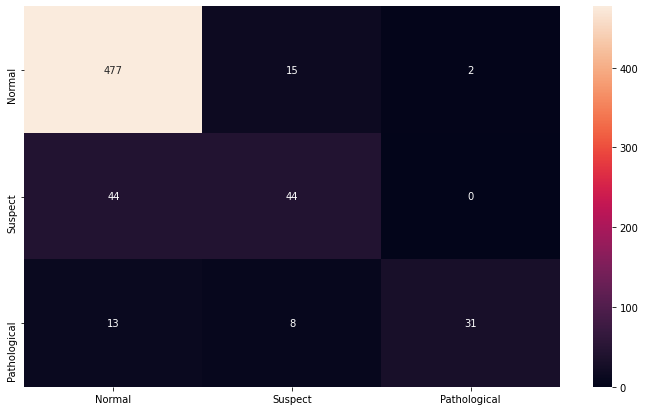

In [100]:
# Confusion Matrix dari model knn sebelumnya
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_knn)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

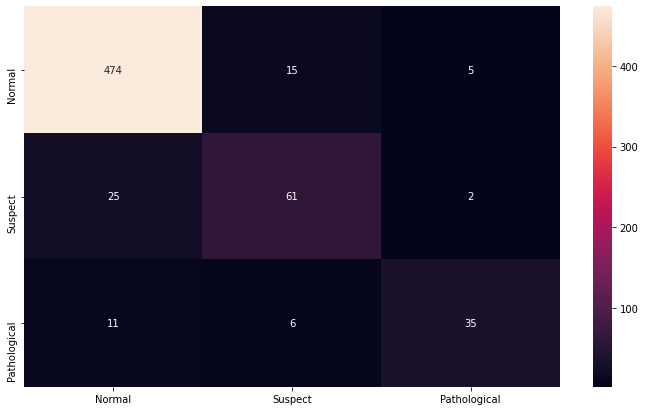

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_dt)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

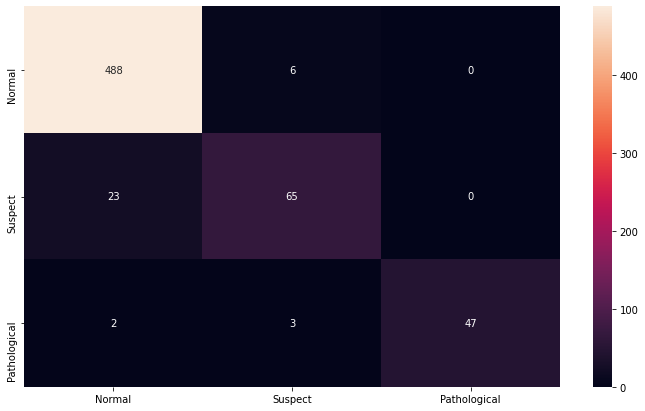

In [102]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_rf)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

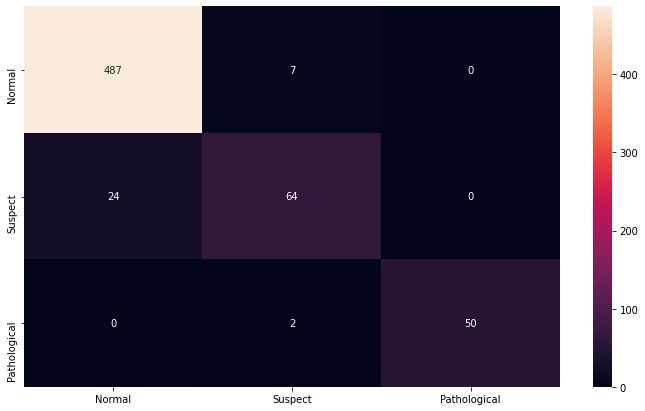

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_test,y_pred_xgb)
cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)
plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()